<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.1.3

## Data

The Philippine Statistics Authority (PSA) spearheads the conduct of the Family Income and Expenditure Survey (FIES) nationwide. The survey, which is undertaken every three (3) years, is aimed at providing data on family income and expenditure, including, among others, levels of consumption by item of expenditure, sources of income in cash, and related information affecting income and expenditure levels and patterns in the Philippines.

You can download the data from [here](https://www.kaggle.com/grosvenpaul/family-income-and-expenditure).

The purpose of today's lab is to use simulation to visualize the sampling distribution for the sample mean. The Central Limit Theorem (CLT) tells us that as our sample size gets larger, the sampling distribution of the sample mean converges to a normal distribution. Therefore, when we have a large sample size, we can say that the sampling distribution for the sample mean is approximately normal, regardless of the distribution from which we are sampling.

Let's start by taking a look at the data, **`Total Household Income`** will serve as a "population" for the purposes of this lab. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
house_hold_csv = pd.read_csv("C:\\Users\\user\\Documents\\IOD\\DATA\\Family_Income_and_Expenditure.csv")
# Read CSV


In [ ]:
#population = house_hold_csv(['Total Household Income'])

In [3]:
# Head
print(house_hold_csv.head())

   Total Household Income Region  Total Food Expenditure  \
0                  480332    CAR                  117848   
1                  198235    CAR                   67766   
2                   82785    CAR                   61609   
3                  107589    CAR                   78189   
4                  189322    CAR                   94625   

  Main Source of Income  Agricultural Household indicator  \
0         Wage/Salaries                                 0   
1         Wage/Salaries                                 0   
2         Wage/Salaries                                 1   
3         Wage/Salaries                                 0   
4         Wage/Salaries                                 0   

   Bread and Cereals Expenditure  Total Rice Expenditure  Meat Expenditure  \
0                          42140                   38300             24676   
1                          17329                   13008             17434   
2                          34182      

In [4]:
# Tail
print(house_hold_csv.tail())

       Total Household Income              Region  Total Food Expenditure  \
41539                  119773  XII - SOCCSKSARGEN                   44875   
41540                  137320  XII - SOCCSKSARGEN                   31157   
41541                  133171  XII - SOCCSKSARGEN                   45882   
41542                  129500  XII - SOCCSKSARGEN                   81416   
41543                  128598  XII - SOCCSKSARGEN                   78195   

            Main Source of Income  Agricultural Household indicator  \
41539  Enterpreneurial Activities                                 1   
41540  Enterpreneurial Activities                                 1   
41541  Enterpreneurial Activities                                 2   
41542  Enterpreneurial Activities                                 1   
41543  Enterpreneurial Activities                                 1   

       Bread and Cereals Expenditure  Total Rice Expenditure  \
41539                          23675          

In [5]:
# Shape

print(house_hold_csv.shape)

(41544, 60)


In [6]:
# Data Types
house_hold_csv.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

#### Surveying the populations

##### 1. Create a histogram of `Total Household Income`.

(array([3.8722e+04, 2.3200e+03, 3.2400e+02, 1.0200e+02, 3.7000e+01,
        1.4000e+01, 1.0000e+01, 3.0000e+00, 3.0000e+00, 1.0000e+00,
        4.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([1.12850000e+04, 6.01520150e+05, 1.19175530e+06, 1.78199045e+06,
        2.37222560e+06, 2.96246075e+06, 3.55269590e+06, 4.14293105e+06,
        4.73316620e+06, 5.32340135e+06, 5.91363650e+06, 6.50387165e+06,
        7.09410680e+06, 7.68434195e+06, 8.27457710e+06, 8.86481225e+06,
        9.45504740e+06, 1.00452826e+07, 1.06355177e+07, 1.12257528e+07,
        1.18159880e+07]),
 <BarContainer object of 20 artists>)

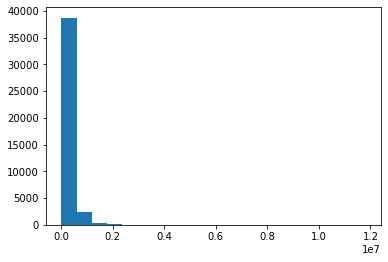

In [7]:
# ANSWER
population = house_hold_csv['Total Household Income']
plt.hist(population,bins= 20)
#plt.hist(house_hold_csv['Total Household Income'],bins=20)


##### 2. How would you describe the shape of this population?

**ANSWER:**

In [8]:
print(population.describe())

count    4.154400e+04
mean     2.475556e+05
std      2.868805e+05
min      1.128500e+04
25%      1.048950e+05
50%      1.640795e+05
75%      2.911385e+05
max      1.181599e+07
Name: Total Household Income, dtype: float64


##### 2. What is the mean income of this population?

In [9]:
# ANSWER
population.mean()

247555.58480165608

##### 3. What sampling statistic/point estimate would you use to estimate the mean of this population if you were given a random sample from the population?

**ANSWER:**

#### Simulated sampling (sample means)

Now, we'd like to get an idea of what happens when we take multiple random samples of size 5. 

Take 10 sample (size=5) from the entire population. Calculate means for each sample. Now make a histogram of all the sample means.

- Describe the shape of the histogram.
- What is the center of the distribution of sample means?

##### 4. Simulation with `sample_size=5`

Take 10 samples, but with a sample size of 5.

In [12]:
population.sample(n=10)
sample_size= 5

18260      57600
9867     1344775
10885      75024
20093     108202
11419      79506
25375      93120
19581     256850
12628     116384
34791     371866
6369      183050
Name: Total Household Income, dtype: int64

In [11]:
help(pd.DataFrame.sample)

Help on function sample in module pandas.core.generic:

sample(self: 'FrameOrSeries', n=None, frac=None, replace=False, weights=None, random_state=None, axis=None) -> 'FrameOrSeries'
    Return a random sample of items from an axis of object.
    
    You can use `random_state` for reproducibility.
    
    Parameters
    ----------
    n : int, optional
        Number of items from axis to return. Cannot be used with `frac`.
        Default = 1 if `frac` = None.
    frac : float, optional
        Fraction of axis items to return. Cannot be used with `n`.
    replace : bool, default False
        Allow or disallow sampling of the same row more than once.
    weights : str or ndarray-like, optional
        Default 'None' results in equal probability weighting.
        If passed a Series, will align with target object on index. Index
        values in weights not found in sampled object will be ignored and
        index values in sampled object not in weights will be assigned
        wei

In [14]:
help(np.random.choice)

Help on built-in function choice:

choice(...) method of numpy.random.mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
    .. versionadded:: 1.7.0
    
    .. note::
        New code should use the ``choice`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if a were np.arange(a)
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement
    p : 1-D array-like, optional
        The probabilities associated with each

In [19]:
help(house_hold_csv.sample)

Help on method sample in module pandas.core.generic:

sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None) -> 'FrameOrSeries' method of pandas.core.frame.DataFrame instance
    Return a random sample of items from an axis of object.
    
    You can use `random_state` for reproducibility.
    
    Parameters
    ----------
    n : int, optional
        Number of items from axis to return. Cannot be used with `frac`.
        Default = 1 if `frac` = None.
    frac : float, optional
        Fraction of axis items to return. Cannot be used with `n`.
    replace : bool, default False
        Allow or disallow sampling of the same row more than once.
    weights : str or ndarray-like, optional
        Default 'None' results in equal probability weighting.
        If passed a Series, will align with target object on index. Index
        values in weights not found in sampled object will be ignored and
        index values in sampled object not in weights will b

In [11]:
#took 5 random population size out of the whole data 
np.random.choice(population, 5)

array([109525, 315386,  73674, 591730, 179320], dtype=int64)

In [20]:
population.sample(n=10)

25692    153044
36323    143225
11308    129122
17689     89730
38970    327068
25823    105692
20995    258005
36563    226460
20032     58880
26155    158857
Name: Total Household Income, dtype: int64


sample_num = 10
sample_size = 5
for i in range(10):
    sample_result = np.random.choice(population, sample_size)
    
print(sample_result)

In [30]:
#sample_num = 10
#sample_size = 5
#for i in range(10):
#    sample_result = np.random.choice(population, sample_size)
    
#print(sample_result)

[ 55838 159548  78131  60070 174232]


###### 4.A Make a histogram of all the sample means

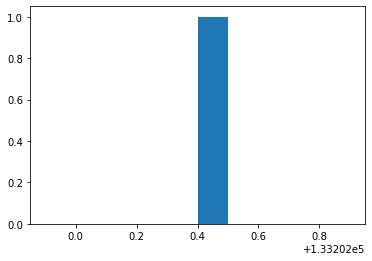

In [10]:
# ANSWER
sampleof5 = population.sample(5)
sampleof5mean = sampleof5.mean
plt.hist(sampleof5mean())
plt.show()
#print(sampleof5mean)

###### 4.B Describe the shape of the histogram.

**ANSWER:**

In [13]:
print(sampleof5mean.shape)

AttributeError: 'function' object has no attribute 'shape'

##### 7. Simulation with `sample_size=15`

let's try taking another 1000 samples, but with a sample size of 15

In [ ]:
# ANSWER

##### 8. Simulation with `sample_size=50`

Let's try taking another 1000 samples, but with a sample size of 50

In [ ]:
# ANSWER

###### 8.A Describe the shape of the histogram of sample means (using sample size of 50)

**ANSWER:**

###### 8.B What is mean of the distribution of sample means?

In [ ]:
# ANSWER

**ANSWER:**

> If repeated random samples of a given size n are taken from a population of values for a quantitative variable, where the population mean is μ (mu) and the population standard deviation is σ (sigma) then the mean of all sample means (x-bars) is population mean μ (mu).

###### 8.C As the sample size grew, did your results confirm the CLT?

**ANSWER:**